In [51]:
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import pandas as pd

In [2]:
with open("diagnosis_dict.json", "r") as fd:
    diagnosis = json.load(fd)

In [4]:
diagnosis.keys()

dict_keys(['444448004', '47693006', '1551000119108', '128613002', '87433001', '429007001', '195662009', '79586000', '90560007', '363406005', '55680006', '410429000', '48333001', '6072007', '368581000119106', '284549007', '236077008', '398254007', '262574004', '195967001', '367498001', '24079001', '67841000119103', '239872002', '232353008', '38822007', '72892002', '425048006', '44054006', '284551006', '94260004', '84757009', '38341003', '35999006', '428251008', '16114001', '26929004', '446096008', '40055000', '359817006', '157141000119108', '110030002', '39848009', '62106007', '230690007', '37849005', '275272006', '82423001', '267253006', '65966004', '444470001', '15724005', '109838007', '403190006', '713197008', '68496003', '196416002', '127013003', '423121009', '241929008', '93761005', '70704007', '403191005', '19169002', '201834006', '64859006', '67831000119107', '15777000', '74400008', '233678006', '43878008', '370247008', '263102004', '192127007', '233604007', '10509002', '44465007

In [6]:
g = nx.Graph()

In [7]:
g.add_nodes_from(diagnosis.keys())

In [123]:
for v1 in g.nodes:
    for v2 in g.nodes:
        k = len(set(diagnosis.get(v1)).intersection(diagnosis.get(v2)))
        if k > 0:
            g.add_edge(v1, v2, weight=k)

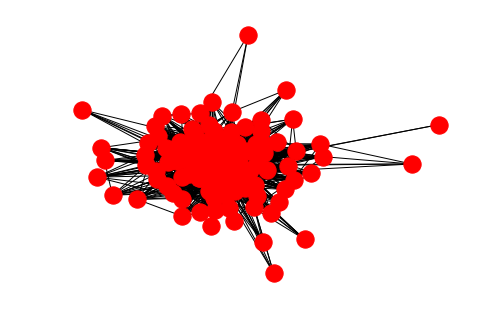

In [124]:
nx.draw(g)

In [125]:
from networkx.algorithms import community
import community

In [38]:
communities_generator = community.girvan_newman(g)
#top_level_communities = next(communities_generator)
#next_level_communities = next(communities_generator)
#level_2_communities = next(communities_generator)
communities_levels = list(itertools.islice(communities_generator, 20))

In [41]:
for i in range(10):
    print(list(map(len, communities_levels[i])))

[117, 1]
[116, 1, 1]
[115, 1, 1, 1]
[114, 1, 1, 1, 1]
[113, 1, 1, 1, 1, 1]
[112, 1, 1, 1, 1, 1, 1]
[111, 1, 1, 1, 1, 1, 1, 1]
[110, 1, 1, 1, 1, 1, 1, 1, 1]
[109, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[108, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Cluster 0: 20 elements
Cluster 1: 5 elements
Cluster 2: 17 elements
Cluster 3: 9 elements
Cluster 4: 4 elements
Cluster 5: 6 elements
Cluster 6: 16 elements
Cluster 7: 8 elements
Cluster 8: 11 elements
Cluster 9: 11 elements
Cluster 10: 1 elements
Cluster 11: 6 elements
Cluster 12: 4 elements


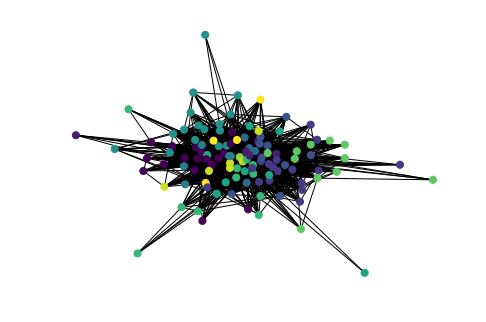

In [211]:
partition = community.best_partition(g)
cluster2node = {}
for k, v in partition.items():
    cluster2node.setdefault(v, []).append(k)

for i in cluster2node:
    print("Cluster " + str(i) + ": " + str(len(cluster2node[i])) + " elements")

labels = list(partition.values())

pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=labels, node_size=50)

In [218]:
nx.set_node_attributes(g, partition, "cluster")

In [225]:
for n, datadict in g.nodes.items():
    print(n, datadict)

444448004 {'cluster': 0}
47693006 {'cluster': 1}
1551000119108 {'cluster': 2}
128613002 {'cluster': 3}
87433001 {'cluster': 1}
429007001 {'cluster': 4}
195662009 {'cluster': 5}
79586000 {'cluster': 6}
90560007 {'cluster': 2}
363406005 {'cluster': 3}
55680006 {'cluster': 7}
410429000 {'cluster': 4}
48333001 {'cluster': 7}
6072007 {'cluster': 8}
368581000119106 {'cluster': 2}
284549007 {'cluster': 0}
236077008 {'cluster': 8}
398254007 {'cluster': 6}
262574004 {'cluster': 8}
195967001 {'cluster': 0}
367498001 {'cluster': 0}
24079001 {'cluster': 0}
67841000119103 {'cluster': 9}
239872002 {'cluster': 8}
232353008 {'cluster': 0}
38822007 {'cluster': 6}
72892002 {'cluster': 6}
425048006 {'cluster': 9}
44054006 {'cluster': 2}
284551006 {'cluster': 5}
94260004 {'cluster': 8}
84757009 {'cluster': 3}
38341003 {'cluster': 10}
35999006 {'cluster': 6}
428251008 {'cluster': 1}
16114001 {'cluster': 4}
26929004 {'cluster': 8}
446096008 {'cluster': 0}
40055000 {'cluster': 11}
359817006 {'cluster': 7}
15

In [226]:
nx.write_gexf(g, "clusters.gexf")

In [229]:
names = pd.read_csv("diagnosis_names.csv")
del names["Unnamed: 0"]
names.head()

,code,display
0,40055000,Chronic sinusitis (disorder)
1,68496003,Polyp of colon
2,53741008,Coronary Heart Disease
3,68496003,Polyp of colon
4,713197008,Recurrent rectal polyp


In [230]:
df_partition = pd.DataFrame([partition.keys(), partition.values()]).transpose()
df_partition.columns = ["code","cluster"]
df_partition.code = pd.to_numeric(df_partition.code)
df_partition.head()

,code,cluster
0,444448004,0
1,47693006,1
2,1551000119108,2
3,128613002,3
4,87433001,1


In [231]:
df_clusters = pd.merge(names, df_partition, on="code").drop_duplicates(subset="code")
df_clusters.head()

,code,display,cluster
0,40055000,Chronic sinusitis (disorder),11
329,68496003,Polyp of colon,3
437,53741008,Coronary Heart Disease,2
535,713197008,Recurrent rectal polyp,3
566,109838007,Overlapping malignant neoplasm of colon,3


In [233]:
df_clusters[df_clusters["cluster"] == 3]

,code,display,cluster
329,68496003,Polyp of colon,3
535,713197008,Recurrent rectal polyp,3
566,109838007,Overlapping malignant neoplasm of colon,3
579,128613002,Seizure disorder,3
633,703151001,History of single seizure (situation),3
687,84757009,Epilepsy,3
6247,93761005,Primary malignant neoplasm of colon,3
6599,95417003,Primary fibromyalgia syndrome,3
6875,363406005,Malignant tumor of colon,3


In [234]:
df_clusters.to_csv("df_clusters.csv")

In [209]:
def neighbours_suggestions(graph, current_diagnosis, past_diagnoses):
    # Neighbours of the current diagnosis
    first = list(nx.all_neighbors(graph, current_diagnosis))
    # give weight 1
    first = list(zip(first, np.repeat(1, len(first))))
    # Neighbours of the past diagnoses
    second = sum([list(nx.all_neighbors(graph, v)) for v in past_diagnoses], [])
    # give weight 0.5
    second = list(zip(second, np.repeat(0.5, len(second))))
    # Add all the weights in case a diagnosis appears several times
    res = {}
    for code, coef in first + second:
        if code in res:
            res[code] += coef
        else:
            res[code] = coef
    return(res)

In [235]:
v1 = list(g.nodes)[0]
vs = list(g.nodes)[4:6]
sugg = neighbours_suggestions(g, v1, vs)
sugg

{'10509002': 2.0,
 '110030002': 0.5,
 '127013003': 1.0,
 '128613002': 1.0,
 '1551000119108': 1.0,
 '157141000119108': 0.5,
 '15777000': 2.0,
 '16114001': 1.0,
 '162573006': 1.0,
 '185086009': 0.5,
 '19169002': 0.5,
 '192127007': 0.5,
 '195662009': 2.0,
 '195967001': 1.0,
 '196416002': 0.5,
 '197927001': 0.5,
 '201834006': 1.0,
 '22298006': 1.0,
 '230690007': 1.0,
 '232353008': 2.0,
 '239872002': 1.0,
 '239873007': 1.0,
 '24079001': 1.5,
 '254632001': 0.5,
 '254637007': 1.0,
 '262574004': 1,
 '263102004': 0.5,
 '267253006': 0.5,
 '26929004': 0.5,
 '283371005': 0.5,
 '283385000': 1.5,
 '284549007': 1.5,
 '33737001': 1.0,
 '359817006': 0.5,
 '367498001': 0.5,
 '368581000119106': 2.0,
 '36971009': 1.0,
 '370247008': 1.0,
 '38341003': 2.0,
 '398254007': 0.5,
 '39848009': 0.5,
 '399211009': 1.0,
 '40055000': 2.0,
 '40275004': 0.5,
 '410429000': 1.0,
 '422034002': 1.0,
 '423121009': 1.0,
 '424132000': 0.5,
 '425048006': 0.5,
 '428251008': 1.0,
 '429007001': 1.0,
 '43878008': 2.0,
 '44054006':

In [240]:
sorted(sugg.items(), key=lambda x: x[1], reverse=True)

[('87433001', 2.0),
 ('195662009', 2.0),
 ('368581000119106', 2.0),
 ('232353008', 2.0),
 ('44054006', 2.0),
 ('38341003', 2.0),
 ('40055000', 2.0),
 ('15777000', 2.0),
 ('43878008', 2.0),
 ('10509002', 2.0),
 ('444814009', 2.0),
 ('444448004', 1.5),
 ('284549007', 1.5),
 ('24079001', 1.5),
 ('446096008', 1.5),
 ('75498004', 1.5),
 ('65363002', 1.5),
 ('283385000', 1.5),
 ('262574004', 1),
 ('47693006', 1.0),
 ('1551000119108', 1.0),
 ('128613002', 1.0),
 ('429007001', 1.0),
 ('90560007', 1.0),
 ('410429000', 1.0),
 ('195967001', 1.0),
 ('239872002', 1.0),
 ('72892002', 1.0),
 ('428251008', 1.0),
 ('16114001', 1.0),
 ('230690007', 1.0),
 ('65966004', 1.0),
 ('713197008', 1.0),
 ('68496003', 1.0),
 ('127013003', 1.0),
 ('423121009', 1.0),
 ('201834006', 1.0),
 ('64859006', 1.0),
 ('74400008', 1.0),
 ('370247008', 1.0),
 ('239873007', 1.0),
 ('399211009', 1.0),
 ('53741008', 1.0),
 ('254637007', 1.0),
 ('58150001', 1.0),
 ('422034002', 1.0),
 ('703151001', 1.0),
 ('22298006', 1.0),
 ('16